# Pronóstico de precio de Cacao Colombiano en Europa a través de series temporales

Para el desarrollo de este notebook serán necesarias las siguientes librerías:

In [88]:
# lib. básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#-----------------------------------
import warnings
warnings.filterwarnings("ignore")

## Preprocesamiento

En esta parte estudiaremos como tratar los datos conseguidos. Es importante detacar que los datos conseguidos en [LegisComex](https://www.legiscomex.com/) corresponden a las transacciones comerciales (exportaciones) de cacao de Colombia desde enero de 2019 a marzo de 2024.

Para poder usar estos datos primero se debe hacer un pre-procesamiento, en el que como se tienen los datos por venta y pueden haber varias ventas en el mismo día se ha decidido utilizar la media diaria de los precios de venta como dato diario. Esta metodología se justifica por varias razones y se sustenta en prácticas comunes de análisis de series temporales en mercados financieros y de productos.

Algunas referencias usadas para aplicar este método son:

- Shumway, R. H., Stoffer, D. S., & Stoffer, D. S. (2000). Time series analysis and its applications (Vol. 3). New York: springer.

Acá el autor hace ejemplos en R en donde varias veces aplica esta técnica, aunque también aplica el uso de  percentiles 0.5 y 0.95 para generar un intervalo de confianza en el que se hará el pronóstico.

- Brockwell, P. J., & Davis, R. A. (Eds.). (2002). Introduction to time series and forecasting. New York, NY: Springer New York.

Valida el uso de Medidas de tendencia central como dato representativo, pero sugiere usar la desviación estándar como variable exógena.

### Carga de datasets

Como se puede explorar en los datasets, hay varipos atributos que no vamos a considerar porque la idea es estudiar el precio unitario y usar las otras variables como variables exógenas.

In [89]:
# datos 2019
df_2019 = pd.read_excel('data/col_2019.xlsx', sheet_name='Detalle', header=2, index_col=0)
df_2019= df_2019[df_2019["Continente Destino"] == "EUROPA"]
df_2019 = df_2019[['Año', 'Mes', 'Dia', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_2019.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
fila,,,,,,
5,2019,1,2,1802.0,18394.77,10.207974
16,2019,1,2,3411.7,19901.86,5.833414
20,2019,1,2,70.0,749.00,10.700000
21,2019,1,2,180.0,3600.00,20.000000
32,2019,1,3,24619.0,69141.51,2.808461


In [90]:
# 2020
df_2020 = pd.read_excel('data/col_2020.xlsx', sheet_name='Detalle', header=2, index_col=0)
df_2020= df_2020[df_2020["Continente Destino"] == "EUROPA"]
df_2020 = df_2020[['Año', 'Mes', 'Dia', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_2020.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
fila,,,,,,
14,2020,1,2,2500.0,15475.0,6.190000
15,2020,1,2,180.0,1260.0,7.000000
52,2020,1,3,10.0,56.0,5.600000
53,2020,1,3,125.0,799.5,6.396000
54,2020,1,3,729.5,5186.4,7.109527


In [91]:
# 2021
df_2021 = pd.read_excel('data/col_2021.xlsx', sheet_name='Detalle', header=2, index_col=0)
df_2021= df_2021[df_2021["Continente Destino"] == "EUROPA"]
df_2021 = df_2021[['Año', 'Mes', 'Dia', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_2021.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
fila,,,,,,
5,2021,1,4,18980.0,76550.86,4.033238
6,2021,1,4,700.0,3483.43,4.976329
7,2021,1,4,17000.0,70882.41,4.169554
8,2021,1,4,1680.0,7661.29,4.560292
42,2021,1,5,25000.0,67500.00,2.700000


In [92]:
# 2022
df_2022 = pd.read_excel('data/col_2022.xlsx', sheet_name='Detalle', header=2, index_col=0)
df_2022= df_2022[df_2022["Continente Destino"] == "EUROPA"]
df_2022 = df_2022[['Año', 'Mes', 'Dia', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_2022.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
fila,,,,,,
12,2022,1,4,13700.0,57351.04,4.186207
13,2022,1,4,900.0,5427.12,6.030133
14,2022,1,4,2000.0,8971.80,4.485900
15,2022,1,4,525.0,2513.68,4.787962
16,2022,1,4,17220.0,72769.85,4.225891


In [93]:
# 2023
df_2023 = pd.read_excel('data/col_2023.xlsx', sheet_name='Detalle', header=2, index_col=0)
df_2023= df_2023[df_2023["Continente Destino"] == "EUROPA"]
df_2023 = df_2023[['Año', 'Mes', 'Dia', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_2023.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
fila,,,,,,
3,2023,1,2,576.0,1250.00,2.170139
13,2023,1,2,25129.0,66136.52,2.631880
70,2023,1,3,300.0,2862.00,9.540000
71,2023,1,3,630.0,4302.00,6.828571
154,2023,1,10,6002.4,42036.00,7.003199


In [94]:
# 2024
df_2024 = pd.read_excel('data/col_2024.xlsx', sheet_name='Detalle', header=2, index_col=0)
df_2024= df_2024[df_2024["Continente Destino"] == "EUROPA"]
df_2024 = df_2024[['Año', 'Mes', 'Dia', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_2024.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
fila,,,,,,
31,2024,1,2,540.6,3264.00,6.037736
39,2024,1,2,900.0,5413.74,6.015267
40,2024,1,2,12150.0,79803.16,6.568161
41,2024,1,2,375.0,2348.25,6.262000
42,2024,1,2,300.0,1463.97,4.879900


Acá unimos los dataframes en uno solo

In [95]:
df_unido = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df_unido.head()

,Año,Mes,Dia,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
0,2019,1,2,1802.0,18394.77,10.207974
1,2019,1,2,3411.7,19901.86,5.833414
2,2019,1,2,70.0,749.00,10.700000
3,2019,1,2,180.0,3600.00,20.000000
4,2019,1,3,24619.0,69141.51,2.808461


In [96]:
df_unido.shape 

(2268, 6)

Hacemos un cambio de nombre para poder tener como referencia la fecha

In [97]:
df_unido.rename(columns={'Año': 'year', 'Mes': 'month', 'Dia': 'day'}, inplace=True)
df_unido['Fecha'] = pd.to_datetime(df_unido[['year', 'month', 'day']])
df_unido.sample()

,year,month,day,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto,Fecha
1158,2021,11,29,260.0,983.72,3.783538,2021-11-29


In [98]:
df_unido=df_unido[['Fecha', 'Peso en kilos netos', 'Valor FOB (USD)', 'Precio Unitario FOB (USD) Peso Neto']]
df_unido.sample()

,Fecha,Peso en kilos netos,Valor FOB (USD),Precio Unitario FOB (USD) Peso Neto
777,2021-03-06,12600.0,55570.64,4.410368


Vemos el comportamiento de la media de precio unitario por día.

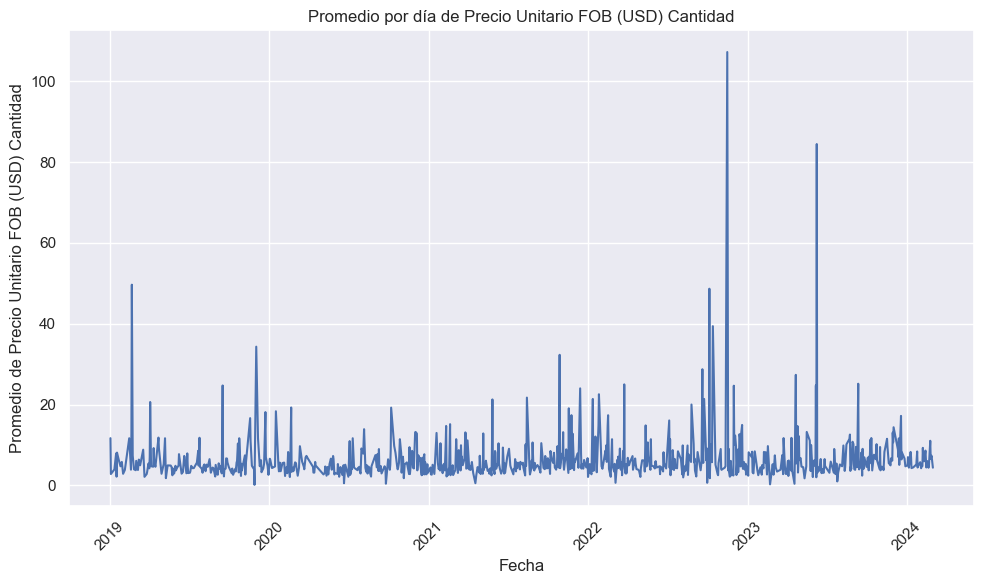

In [99]:
promedio_por_dia = df_unido.groupby('Fecha')['Precio Unitario FOB (USD) Peso Neto'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(promedio_por_dia.index, promedio_por_dia.values)
plt.title('Promedio por día de Precio Unitario FOB (USD) Cantidad')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precio Unitario FOB (USD) Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ahora vamos a generar nuestro datset de series temporales:

### Dataset

Para comenzar se puede ver en la gráfica que hay valores bastante grandes que están afectando los promedios, pueden ser transacciones bastante extrañas.

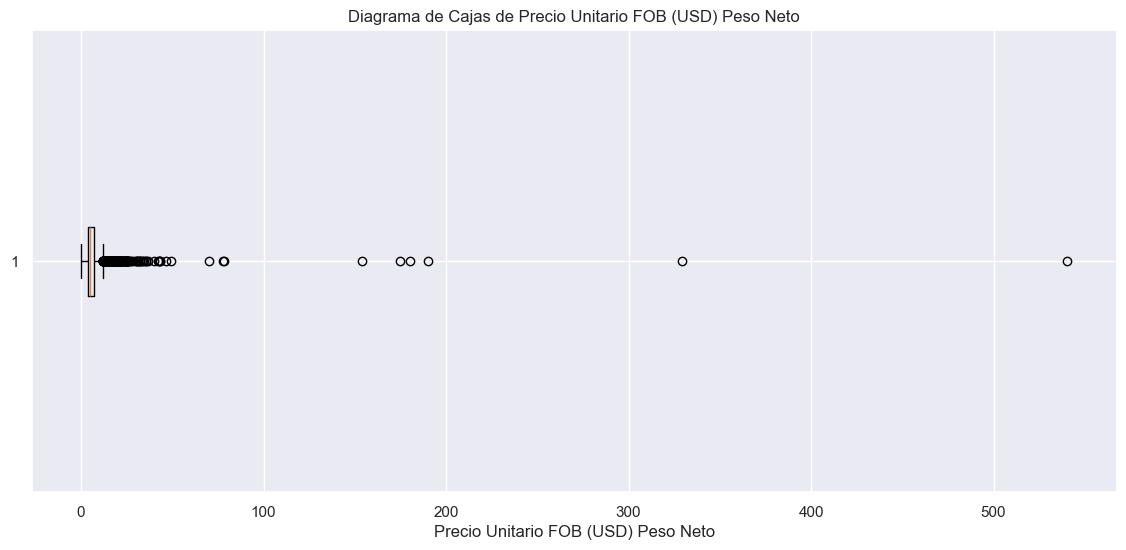

In [100]:
plt.figure(figsize=(14, 6))
plt.boxplot(df_unido['Precio Unitario FOB (USD) Peso Neto'].dropna(), vert=False)
plt.title('Diagrama de Cajas de Precio Unitario FOB (USD) Peso Neto')
plt.xlabel('Precio Unitario FOB (USD) Peso Neto')
plt.show()

Hay valores atipicos que afectan considerablemente el desarrollo, de forma que voy a eliminar los valores atipicos mas extraños como aquella venta de mas de 500 dolares por unidad.

In [101]:
percentil_975 = df_unido['Precio Unitario FOB (USD) Peso Neto'].quantile(0.975)
df_unido = df_unido[df_unido['Precio Unitario FOB (USD) Peso Neto'] <= percentil_975]

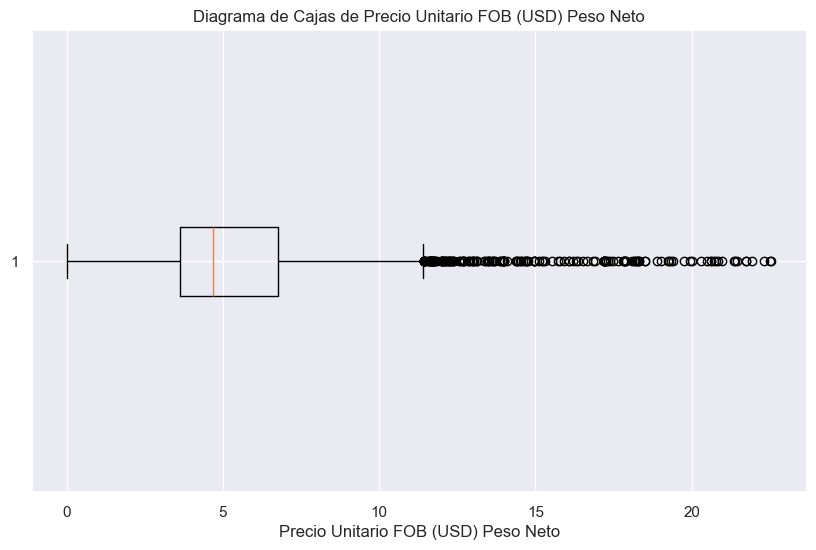

In [102]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_unido['Precio Unitario FOB (USD) Peso Neto'].dropna(), vert=False)
plt.title('Diagrama de Cajas de Precio Unitario FOB (USD) Peso Neto')
plt.xlabel('Precio Unitario FOB (USD) Peso Neto')
plt.show()

Ahora si se ven valores mas realistas deacuerdo a las tasas comerciales del grano de cacao usuales.
Vamos a crear el dataset con los valores de medias de las variables y como fue recomendado en la bibliografía se tendrá en cuenta la desviación estándar como variable exógena.

In [103]:
dataset = df_unido.groupby('Fecha').agg({
    'Peso en kilos netos': 'mean',
    'Valor FOB (USD)': 'mean',
    'Precio Unitario FOB (USD) Peso Neto': ['mean', 'std']
}).reset_index()

dataset.head()

Fecha Peso en kilos netos Valor FOB (USD)  \
                            mean            mean   
0 2019-01-02            1365.925      10661.4075   
1 2019-01-03           24619.000      69141.5100   
2 2019-01-11             495.000       1955.5525   
3 2019-01-15             660.500       4909.6000   
4 2019-01-16             417.200        900.0000   

  Precio Unitario FOB (USD) Peso Neto            
                                 mean       std  
0                           11.685347  5.959086  
1                            2.808461       NaN  
2                            3.950608  0.000004  
3                            7.913333  5.308015  
4                            2.157239       NaN

In [104]:
dataset.columns = dataset.columns.droplevel()

# Renombrar las columnas
dataset.columns = ['Fecha', 'Promedio de Peso en kilos netos', 'Promedio de Valor FOB (USD)',
                                'Promedio de Precio Unitario FOB (USD) Peso Neto', 'Desviación Estándar de Precio Unitario FOB (USD) Peso Neto']

In [105]:
dataset.head()

,Fecha,Promedio de Peso en kilos netos,Promedio de Valor FOB (USD),Promedio de Precio Unitario FOB (USD) Peso Neto,Desviación Estándar de Precio Unitario FOB (USD) Peso Neto
0,2019-01-02,1365.925,10661.4075,11.685347,5.959086
1,2019-01-03,24619.000,69141.5100,2.808461,NaN
2,2019-01-11,495.000,1955.5525,3.950608,0.000004
3,2019-01-15,660.500,4909.6000,7.913333,5.308015
4,2019-01-16,417.200,900.0000,2.157239,NaN


Ahora indexamos por la fecha, esto era necesario y es la razón por la que unificamos los datos a partir de la media.

In [106]:
dataset.set_index("Fecha", inplace=True)

Llenamos los valores NaN de la desviación.

In [107]:
dataset['Desviación Estándar de Precio Unitario FOB (USD) Peso Neto'].fillna(0, inplace=True)

In [108]:
dataset.sample(5)

,Promedio de Peso en kilos netos,Promedio de Valor FOB (USD),Promedio de Precio Unitario FOB (USD) Peso Neto,Desviación Estándar de Precio Unitario FOB (USD) Peso Neto
Fecha,,,,
2021-01-09,60000.000000,306000.000000,5.100000,0.000000
2021-06-23,2682.142857,11755.697143,5.452527,1.701320
2022-07-07,148.960000,1702.400000,11.428571,0.000000
2023-12-19,8109.250000,44327.300000,6.425184,3.084958
2021-08-25,5197.820000,17689.546250,5.042209,1.837806


Por comodidad voy a renombrar algunas columnas

In [109]:
dataset.rename(columns={
    'Promedio de Peso en kilos netos': 'kilosnetos',
    'Promedio de Valor FOB (USD)': 'Valortotal',
    'Promedio de Precio Unitario FOB (USD) Peso Neto': 'Precio Unitario FOB (USD) Peso Neto',
    'Desviación Estándar de Precio Unitario FOB (USD) Peso Neto': 'Desvest'
}, inplace=True)

Usaremos como frecuencia los días comerciales

In [110]:
dataset = dataset.asfreq('b')

llenaremos los valores faltantes con 'bfill'

In [111]:
dataset = dataset.fillna(method='bfill')

Hacemos la división de datos de entrenamiento y prueba, acá es bastante especial porque se necesita una continuidad.

In [112]:
dataset.to_csv('out/data.csv')

In [113]:
# division de los datos 80-20
size = int(len(dataset)*0.8)
data, df_test =dataset.iloc[:size], dataset.iloc[size:]

Gráficamos como quedó la serie temporal en losa datos de entrenamiento

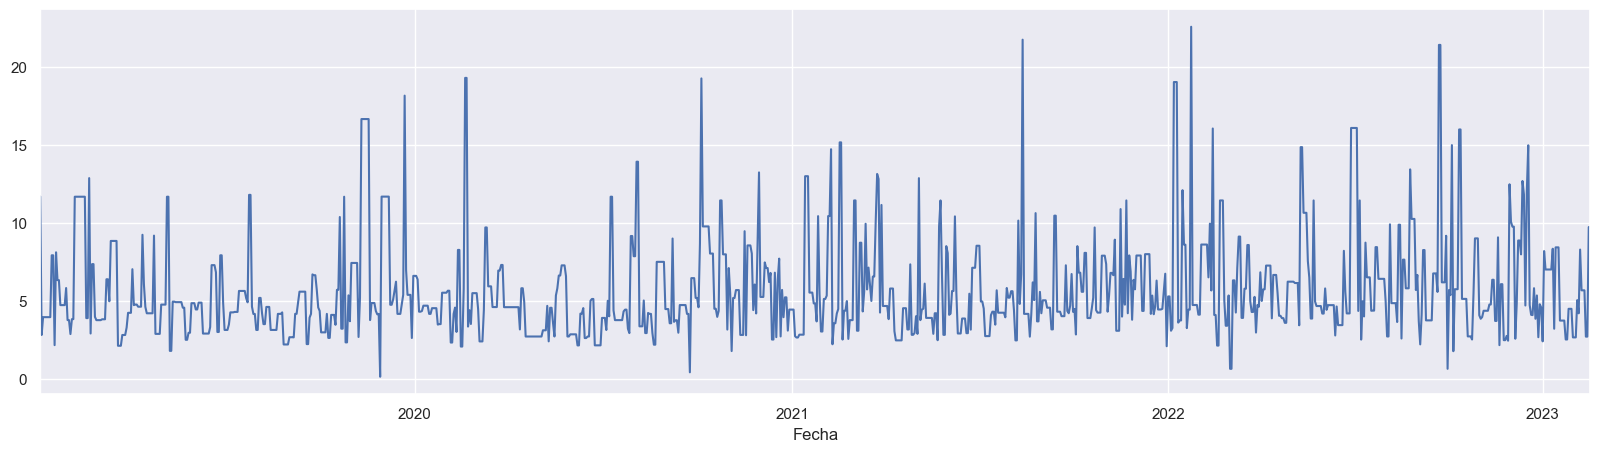

In [114]:
data['Precio Unitario FOB (USD) Peso Neto'].plot(figsize=(20,5))
#plt.title("Valor unitario", size=24)
plt.show()

## Serie temporal

cargamos los paquetes necesarios para esta sección:

In [115]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 

### Estacionariedad

Aplicamos la prueba DF para la serie temporal

In [116]:
sts.adfuller(data['Precio Unitario FOB (USD) Peso Neto'])

(-20.268210446857296,
 0.0,
 0,
 1076,
 {'1%': -3.436441978605957,
  '5%': -2.864229841568573,
  '10%': -2.5682021659802934},
 5208.026822574717)

La serie es estacionaria.

### Seasonality

Miramos la desscomposición aditiva:

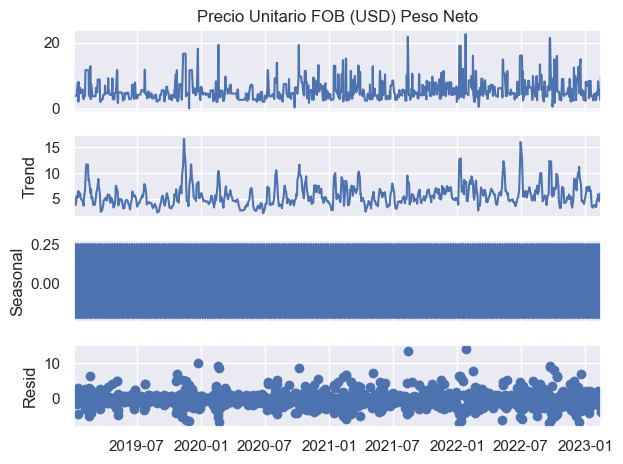

In [117]:
s_dec_additive = seasonal_decompose(data['Precio Unitario FOB (USD) Peso Neto'], model="aditive")
s_dec_additive.plot()
plt.show()

también la multiplicativa:

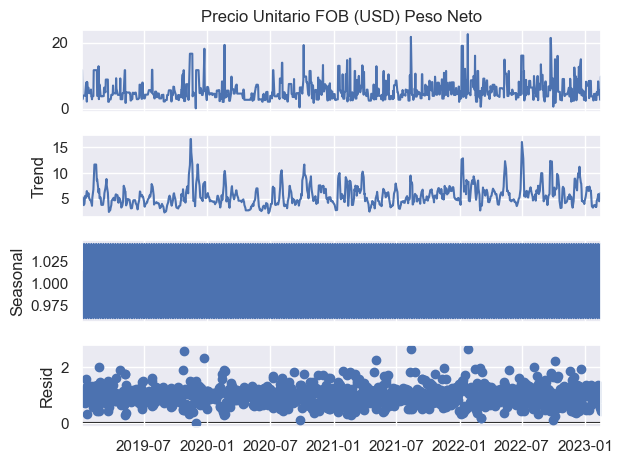

In [118]:
s_dec_multiplicative = seasonal_decompose(data['Precio Unitario FOB (USD) Peso Neto'], model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

### Autocorrelación

Exploramos las autocorrelaciones:

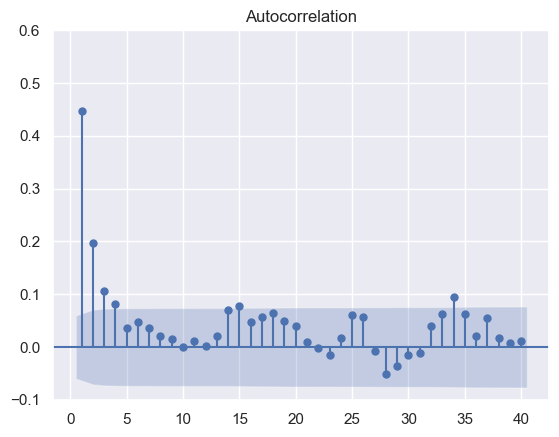

In [119]:
sgt.plot_acf(data['Precio Unitario FOB (USD) Peso Neto'], lags=40, zero=False)
#plt.title('ACF', size=24)
plt.ylim(-0.1, 0.6)
plt.show()

Tenemos 4 retrasos significativos para media moviles MA.

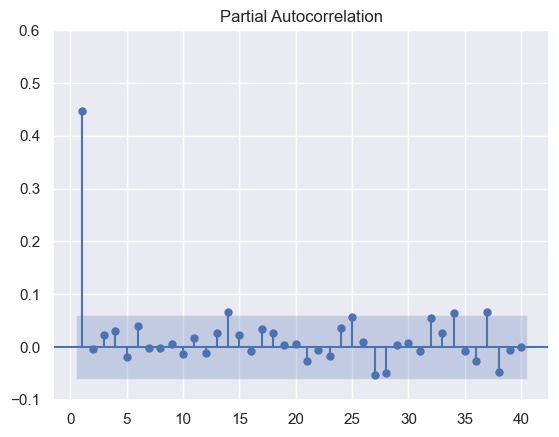

In [120]:
sgt.plot_pacf(data['Precio Unitario FOB (USD) Peso Neto'], lags=40, zero=False, method=('ols'))
#plt.title('PACF S&P', size=24)
plt.ylim(-0.1, 0.6)
plt.show()

El primer y el sexto retraso son significativos para componentes autorregresivos AR.

Definimos el test de verosimilitud que será crucial para la selección del modelo adecuado.

In [121]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

Buscaremos el mejor modelo basado en:
- Todos los coeficientes sean significativos.
- Alta log-verosimilitud
- Bajo criterio de información (AIC o BIC)
- El aumento de complejidad sea estadísticamente significativo.

### modelos AR

Empezamos con el más básico que es AR(1)

In [122]:
arma_1 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(1,0,0))
results_ret_ar_1 = arma_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(1, 0, 0)   Log Likelihood               -2654.984
Date:                                 Thu, 13 Jun 2024   AIC                           5315.969
Time:                                         17:19:51   BIC                           5330.914
Sample:                                     01-02-2019   HQIC                          5321.629
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6732      0.223     25.450      0.000       5.236       6.110
ar.L1          0.4486      0.019     23.948      0.000       0.412       0.485
sigma2         8.1031      0.239     33.872      0.000       7.634       8.572
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1819.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mirando otros modelos posibles, no se obtienen coeficientes signficativos como lo veiamos en el PACF. Por ejemplo para AR(2):

In [123]:
arma_2 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(2,0,0))
results_ret_ar_2 = arma_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(2, 0, 0)   Log Likelihood               -2654.976
Date:                                 Thu, 13 Jun 2024   AIC                           5317.952
Time:                                         17:19:51   BIC                           5337.880
Sample:                                     01-02-2019   HQIC                          5325.499
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6731      0.222     25.525      0.000       5.237       6.109
ar.L1          0.4504      0.021     20.984      0.000       0.408       0.492
ar.L2         -0.0039      0.026     -0.152      0.879      -0.054       0.046
sigma2         8.1030      0.241     33.601      0.000       7.630       8.576
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1816.56
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA

Ahora vamos con MA(1)

In [124]:
ma_1 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(0,0,1))
results_ret_ma_1 = ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(0, 0, 1)   Log Likelihood               -2673.487
Date:                                 Thu, 13 Jun 2024   AIC                           5352.975
Time:                                         17:19:51   BIC                           5367.920
Sample:                                     01-02-2019   HQIC                          5358.634
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6689      0.170     33.382      0.000       5.336       6.002
ma.L1          0.3932      0.020     19.778      0.000       0.354       0.432
sigma2         8.3867      0.256     32.782      0.000       7.885       8.888
===================================================================================
Ljung-Box (L1) (Q):                   5.00   Jarque-Bera (JB):              1583.82
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Probamos las otras opciones de medias móviles:

In [125]:
ma_2 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(0,0,2))
results_ret_ma_2 = ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(0, 0, 2)   Log Likelihood               -2658.488
Date:                                 Thu, 13 Jun 2024   AIC                           5324.976
Time:                                         17:19:51   BIC                           5344.904
Sample:                                     01-02-2019   HQIC                          5332.523
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6711      0.195     29.051      0.000       5.288       6.054
ma.L1          0.4477      0.021     21.053      0.000       0.406       0.489
ma.L2          0.1555      0.025      6.105      0.000       0.106       0.205
sigma2         8.1561      0.241     33.785      0.000       7.683       8.629
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1715.46
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
ma_3 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(0,0,3))
results_ret_ma_3 = ma_3.fit()
results_ret_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(0, 0, 3)   Log Likelihood               -2656.855
Date:                                 Thu, 13 Jun 2024   AIC                           5323.709
Time:                                         17:19:52   BIC                           5348.619
Sample:                                     01-02-2019   HQIC                          5333.143
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6720      0.207     27.353      0.000       5.266       6.078
ma.L1          0.4482      0.021     20.929      0.000       0.406       0.490
ma.L2          0.1777      0.027      6.636      0.000       0.125       0.230
ma.L3          0.0546      0.026      2.082      0.037       0.003       0.106
sigma2         8.1314      0.244     33.379      0.000       7.654       8.609
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1772.22
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
ma_4 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(0,0,4))
results_ret_ma_4 = ma_4.fit()
results_ret_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(0, 0, 4)   Log Likelihood               -2653.856
Date:                                 Thu, 13 Jun 2024   AIC                           5319.711
Time:                                         17:19:52   BIC                           5349.603
Sample:                                     01-02-2019   HQIC                          5331.031
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6730      0.219     25.846      0.000       5.243       6.103
ma.L1          0.4526      0.021     21.075      0.000       0.410       0.495
ma.L2          0.1874      0.027      6.980      0.000       0.135       0.240
ma.L3          0.0840      0.028      2.996      0.003       0.029       0.139
ma.L4          0.0745      0.028      2.634      0.008       0.019       0.130
sigma2         8.0860      0.241     33.594      0.000       7.614       8.558
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1812.60
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mirando el AIC y verosimilitud:

In [128]:
print("AR(1):  \t LL = ", results_ret_ar_1.llf, "\t AIC = ", results_ret_ar_1.aic)
print("MA(1):  \t LL = ", results_ret_ma_1.llf, "\t AIC = ", results_ret_ma_1.aic)
print("MA(2):  \t LL = ", results_ret_ma_2.llf, "\t AIC = ", results_ret_ma_2.aic)
print("MA(3):  \t LL = ", results_ret_ma_3.llf, "\t AIC = ", results_ret_ma_3.aic)
print("MA(4):  \t LL = ", results_ret_ma_4.llf, "\t AIC = ", results_ret_ma_4.aic)

AR(1):  	 LL =  -2654.984324888914 	 AIC =  5315.968649777828
MA(1):  	 LL =  -2673.4872508742865 	 AIC =  5352.974501748573
MA(2):  	 LL =  -2658.4881306535876 	 AIC =  5324.976261307175
MA(3):  	 LL =  -2656.8547272899523 	 AIC =  5323.709454579905
MA(4):  	 LL =  -2653.8556753635867 	 AIC =  5319.711350727173


Según esto el mejor de MA es MA(4), pero el mejor en general es AR(1).

Vamos a evaluar si es significativamente mejor.

In [129]:
print("\nLLR test p-value = " + str(LLR_test(results_ret_ar_1, results_ret_ma_4, DF = 3)))


LLR test p-value = 0.521


Según esto es significativamente mejor AR(1), que tiene un desempeño similar pero menos complejidad.

### ARMA

Comenzamos con el modelo mas simple. ARMA(1,1)

In [130]:
arma_1_1 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(1,0,1))
results_ret_ar_1_ma_1 = arma_1_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(1, 0, 1)   Log Likelihood               -2654.975
Date:                                 Thu, 13 Jun 2024   AIC                           5317.950
Time:                                         17:19:52   BIC                           5337.878
Sample:                                     01-02-2019   HQIC                          5325.497
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6731      0.222     25.536      0.000       5.238       6.109
ar.L1          0.4409      0.051      8.727      0.000       0.342       0.540
ma.L1          0.0097      0.057      0.169      0.866      -0.103       0.122
sigma2         8.1030      0.241     33.599      0.000       7.630       8.576
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1816.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Este modelo no cumple con lo requerido, pero siempre es bueno usarlo como referencia.

In [131]:
print("\nARMA vs AR ", LLR_test(results_ret_ar_1, results_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(results_ret_ma_1, results_ret_ar_1_ma_1))


ARMA vs AR  0.893

ARMA vs MA  0.0


Con respecto a AR no hay evidecia de mejora, mientras con MA si. Como se ve sigue siendo mejor AR(1).

Para Ar serían hasta 1 y para MA serian hasta 4

Miramos las opciones de hasta 4 retrasos (el mayor entre ACF y PACF), en nuestro caso ninguno de los posibles modelos con p,q<5  cumple lo buscado.

El mas cercano fue este:

In [132]:
arma_3_3 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(3,0,3))
results_ret_ar_3_ma_3 = arma_3_3.fit()
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(3, 0, 3)   Log Likelihood               -2652.451
Date:                                 Thu, 13 Jun 2024   AIC                           5320.902
Time:                                         17:19:54   BIC                           5360.758
Sample:                                     01-02-2019   HQIC                          5335.995
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5931      0.225     24.813      0.000       5.151       6.035
ar.L1         -0.9702      0.121     -8.019      0.000      -1.207      -0.733
ar.L2         -0.2280      0.103     -2.207      0.027      -0.431      -0.026
ar.L3          0.4160      0.056      7.436      0.000       0.306       0.526
ma.L1          1.4204      0.124     11.416      0.000       1.177       1.664
ma.L2          0.8583      0.146      5.864      0.000       0.571       1.145
ma.L3         -0.0428      0.068     -0.628      0.530      -0.176       0.091
sigma2         8.0311      0.238     33.766      0.000       7.565       8.497
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1830.70
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA

Empezamos con el modelo mas simple ARIMA(1,1,1)

In [133]:
model_ar_1_1_1 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(1,1,1))
results_ar_1_1_1 = model_ar_1_1_1.fit()
results_ar_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(1, 1, 1)   Log Likelihood               -2654.365
Date:                                 Thu, 13 Jun 2024   AIC                           5314.731
Time:                                         17:19:54   BIC                           5329.674
Sample:                                     01-02-2019   HQIC                          5320.390
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4411      0.018     25.206      0.000       0.407       0.475
ma.L1         -0.9945      0.004   -257.803      0.000      -1.002      -0.987
sigma2         8.1057      0.189     42.929      0.000       7.736       8.476
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1820.37
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

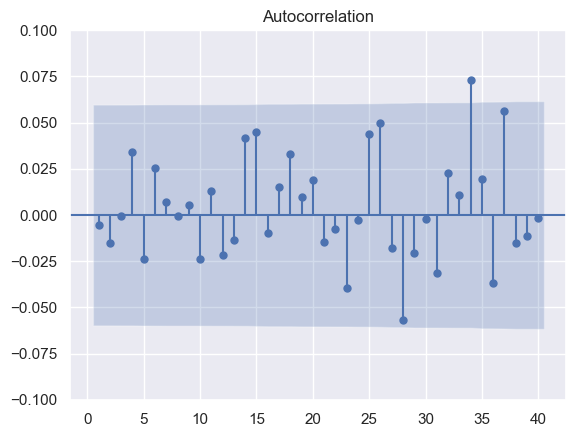

In [134]:
data['res_ar_1_i_1_ma_1'] = results_ar_1_1_1.resid
sgt.plot_acf(data.res_ar_1_i_1_ma_1, zero = False, lags = 40)
#plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.ylim(-0.1, 0.1)
plt.show()

Como vemos no se ve que tenga retrasos significativos.

El único modelo que funciona es el siguiente:

In [135]:
model_ar_3_1_3 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(3,1,3))
results_ar_3_1_3 = model_ar_3_1_3.fit()
results_ar_3_1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(3, 1, 3)   Log Likelihood               -2651.623
Date:                                 Thu, 13 Jun 2024   AIC                           5317.246
Time:                                         17:19:56   BIC                           5352.113
Sample:                                     01-02-2019   HQIC                          5330.450
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0316      0.044    -23.676      0.000      -1.117      -0.946
ar.L2         -0.3064      0.036     -8.612      0.000      -0.376      -0.237
ar.L3          0.3987      0.031     12.773      0.000       0.338       0.460
ma.L1          0.4905      0.037     13.093      0.000       0.417       0.564
ma.L2         -0.5206      0.027    -19.529      0.000      -0.573      -0.468
ma.L3         -0.9508      0.035    -27.486      0.000      -1.019      -0.883
sigma2         8.0647      0.189     42.653      0.000       7.694       8.435
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1808.01
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             1.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
model_ar_1_1_0 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(1,1,0))
results_ar_1_1_0 = model_ar_1_1_0.fit()

model_ar_2_1_0 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(2,1,0))
results_ar_2_1_0 = model_ar_2_1_0.fit()

model_ar_0_1_1 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(0,1,1))
results_ar_0_1_1 = model_ar_0_1_1.fit()

model_ar_0_1_2 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], order=(0,1,2))
results_ar_0_1_2 = model_ar_0_1_2.fit()

In [137]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_1_1.llf, "\t AIC = ", results_ar_1_1_1.aic)
print("ARIMA(3,1,3):  \t LL = ", results_ar_3_1_3.llf, "\t AIC = ", results_ar_3_1_3.aic)
print("ARIMA(1,1,0):  \t LL = ", results_ar_1_1_0.llf, "\t AIC = ", results_ar_1_1_0.aic)
print("ARIMA(2,1,0):  \t LL = ", results_ar_2_1_0.llf, "\t AIC = ", results_ar_2_1_0.aic)
print("ARIMA(0,1,1):  \t LL = ", results_ar_0_1_1.llf, "\t AIC = ", results_ar_0_1_1.aic)
print("ARIMA(0,1,2):  \t LL = ", results_ar_0_1_2.llf, "\t AIC = ", results_ar_0_1_2.aic)

ARIMA(1,1,1):  	 LL =  -2654.3653082163833 	 AIC =  5314.7306164327665
ARIMA(3,1,3):  	 LL =  -2651.6228567142007 	 AIC =  5317.245713428401
ARIMA(1,1,0):  	 LL =  -2783.96348252167 	 AIC =  5571.92696504334
ARIMA(2,1,0):  	 LL =  -2753.587425002632 	 AIC =  5513.174850005264
ARIMA(0,1,1):  	 LL =  -2735.632818715342 	 AIC =  5475.265637430684
ARIMA(0,1,2):  	 LL =  -2668.9447623276174 	 AIC =  5343.889524655235


Como vemos (3,1,3) aunque es bueno, tiene mejor verosimilitud el modelo (1,1,1)

In [138]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_1_1, results_ar_3_1_3, DF = 4)))


LLR test p-value = 0.241


El elegido es (1,1,1).

## Evaluación

Vamos a evaluar los modelos AR(1) y ARIMA(1,1,1)

Los modelos son:

- AR(1): results_ret_ar_1
- ARIMA(1,1,1): results_ar_1_1_1

##### Revisión de os modelos

Definimos las fechas a utilizar

In [139]:
fecha_menor = data.index.min()
fecha_mayor = data.index.max()

print("Fecha más temprana:", fecha_menor)
print("Fecha más reciente:", fecha_mayor)

Fecha más temprana: 2019-01-02 00:00:00
Fecha más reciente: 2023-02-16 00:00:00


In [140]:
start_date_train = "2019-01-02"
end_date_train = "2023-02-16"

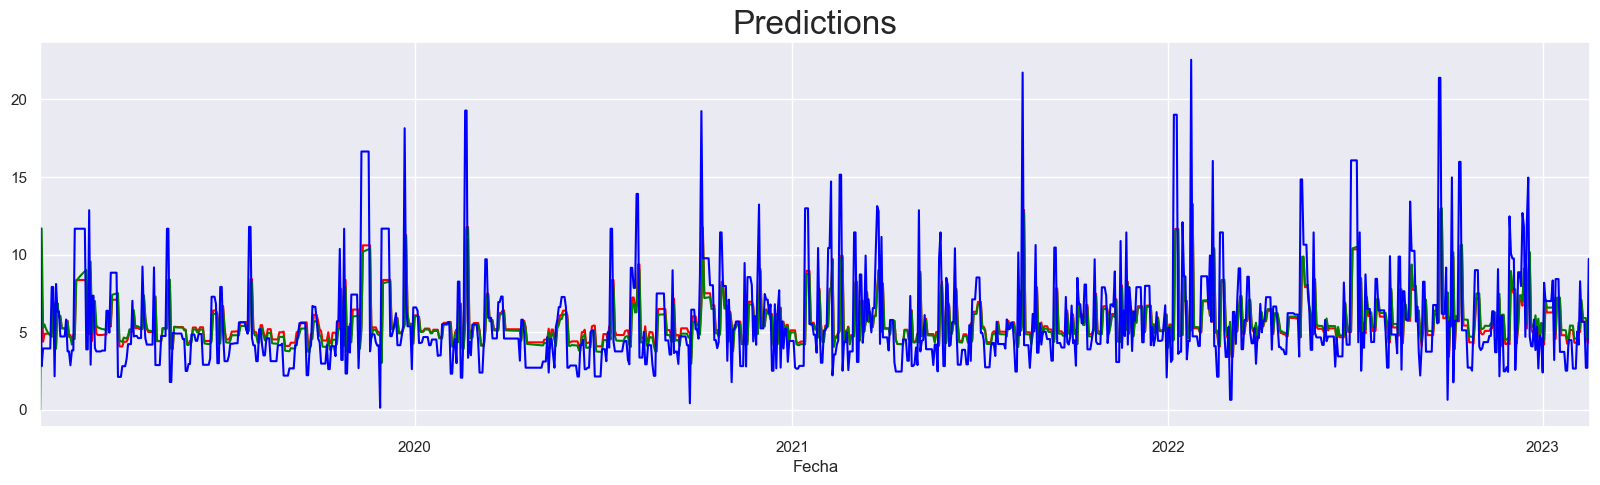

In [141]:
df_pred_ar1_train = results_ret_ar_1.predict(start = start_date_train, end = end_date_train)
df_pred_arima1_train = results_ar_1_1_1.predict(start = start_date_train, end = end_date_train)

df_pred_ar1_train[start_date_train:end_date_train].plot(figsize = (20,5), color = "red")
df_pred_arima1_train[start_date_train:end_date_train].plot(figsize = (20,5), color = "green")

data['Precio Unitario FOB (USD) Peso Neto'][start_date_train:end_date_train].plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()

In [142]:

fecha_menor = df_test.index.min()
fecha_mayor = df_test.index.max()

print("Fecha más temprana:", fecha_menor)
print("Fecha más reciente:", fecha_mayor)

Fecha más temprana: 2023-02-17 00:00:00
Fecha más reciente: 2024-02-29 00:00:00


Entonces la evaluación será:

In [143]:
start_date = "2023-02-17"
end_date = "2024-02-29"

In [144]:
df_pred_ar1 = results_ret_ar_1.predict(start = start_date, end = end_date)
df_pred_arima1 = results_ar_1_1_1.predict(start = start_date, end = end_date)

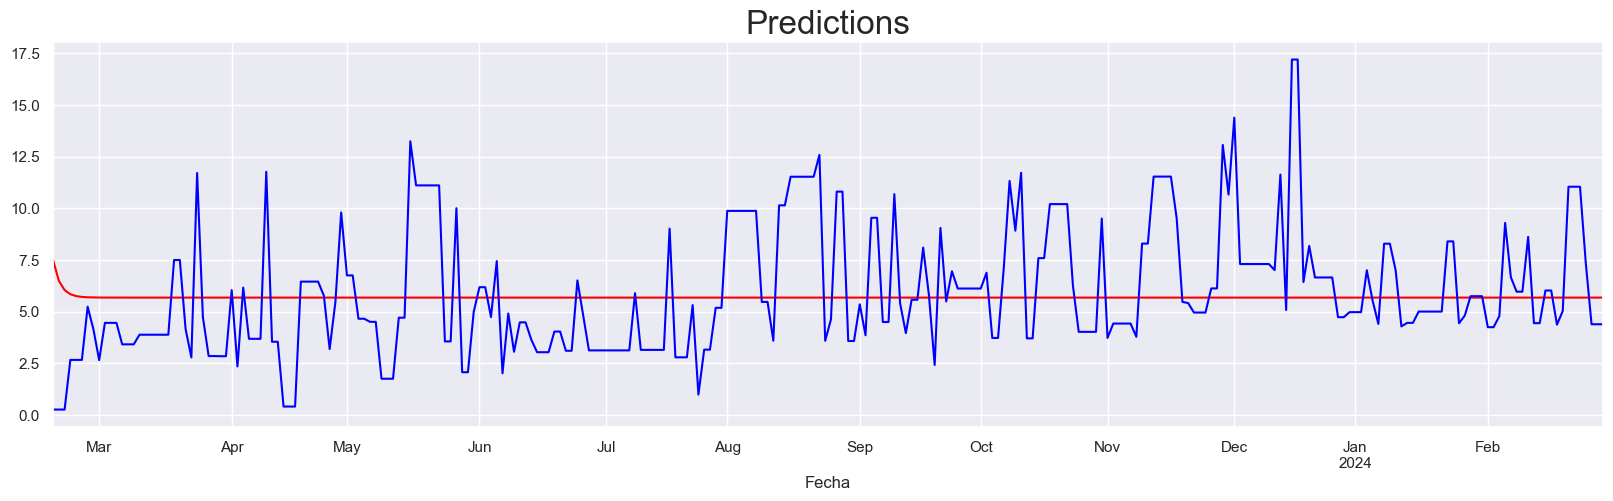

In [145]:
df_pred_ar1[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test['Precio Unitario FOB (USD) Peso Neto'][start_date:end_date].plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()

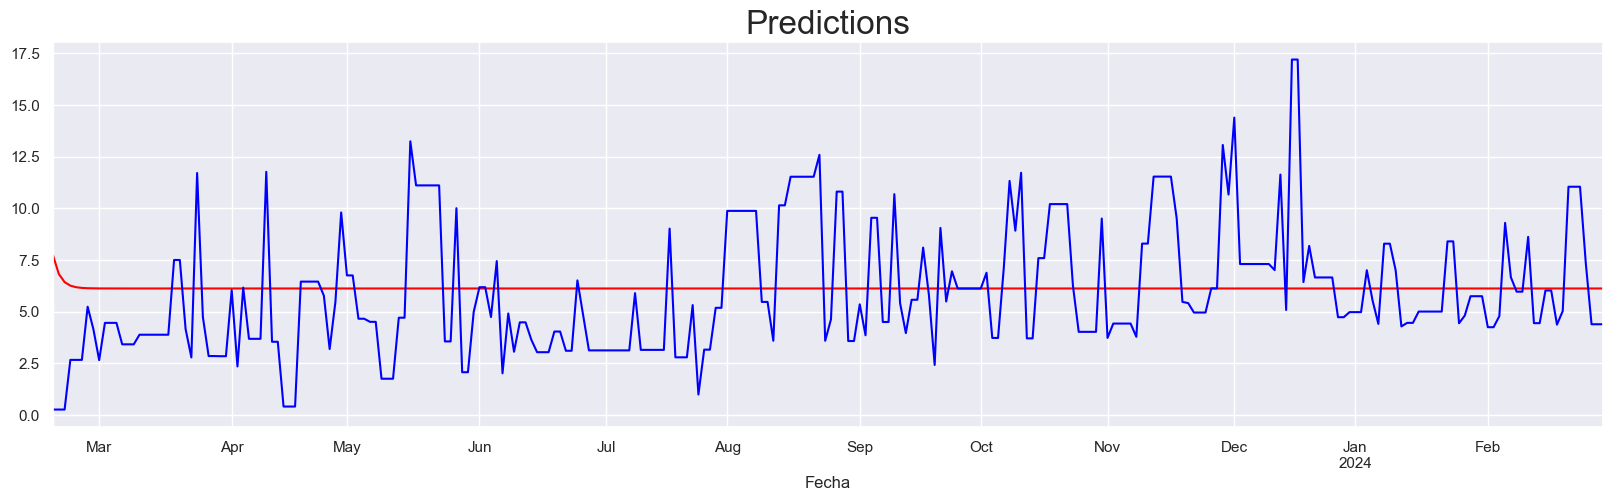

In [146]:
df_pred_arima1[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test['Precio Unitario FOB (USD) Peso Neto'][start_date:end_date].plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()

Las predicciones no son muy buenas, veamos con datos exógenos:

#### ARIMAX

In [147]:
#AR(1)
model_ret_arimax_1_0_0 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], exog = data[['kilosnetos',	'Valortotal', 'Desvest']], order = (1,0,0))
results_ret_armax1 = model_ret_arimax_1_0_0.fit()
results_ret_armax1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(1, 0, 0)   Log Likelihood               -2478.434
Date:                                 Thu, 13 Jun 2024   AIC                           4968.869
Time:                                         17:19:58   BIC                           4998.761
Sample:                                     01-02-2019   HQIC                          4980.189
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8340      0.211     27.604      0.000       5.420       6.248
kilosnetos    -0.0002   1.71e-05    -13.827      0.000      -0.000      -0.000
Valortotal  4.374e-05   3.82e-06     11.449      0.000    3.63e-05    5.12e-05
Desvest        0.4443      0.039     11.281      0.000       0.367       0.521
ar.L1          0.4572      0.016     27.873      0.000       0.425       0.489
sigma2         5.8445      0.152     38.373      0.000       5.546       6.143
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):              4535.65
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             1.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
df_pred_armax = results_ret_armax1.predict(start = start_date, end = end_date, 
                                          exog = df_test[['kilosnetos',	'Valortotal', 'Desvest']][start_date:end_date]) 

In [149]:
#ARIMAX(1,1,1)
model_ret_arimax_1_1_1 = ARIMA(data['Precio Unitario FOB (USD) Peso Neto'], exog = data[['kilosnetos',	'Valortotal', 'Desvest']], order = (1,1,1))
results_ret_armax2 = model_ret_arimax_1_1_1.fit()
results_ret_armax2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   No. Observations:                 1077
Model:                                  ARIMA(1, 1, 1)   Log Likelihood               -2513.373
Date:                                 Thu, 13 Jun 2024   AIC                           5038.747
Time:                                         17:19:59   BIC                           5068.633
Sample:                                     01-02-2019   HQIC                          5050.065
                                          - 02-16-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
kilosnetos    -0.0002   1.61e-05    -14.904      0.000      -0.000      -0.000
Valortotal  4.358e-05    3.6e-06     12.101      0.000    3.65e-05    5.06e-05
Desvest        0.4272      0.038     11.172      0.000       0.352       0.502
ar.L1          0.6098      0.028     21.731      0.000       0.555       0.665
ma.L1         -0.9520      0.021    -45.295      0.000      -0.993      -0.911
sigma2         6.8555      0.166     41.371      0.000       6.531       7.180
===================================================================================
Ljung-Box (L1) (Q):                  16.38   Jarque-Bera (JB):              4595.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:

df_pred_armax2 = results_ret_armax2.predict(start = start_date, end = end_date, 
                                          exog = df_test[['kilosnetos',	'Valortotal', 'Desvest']][start_date:end_date]) 

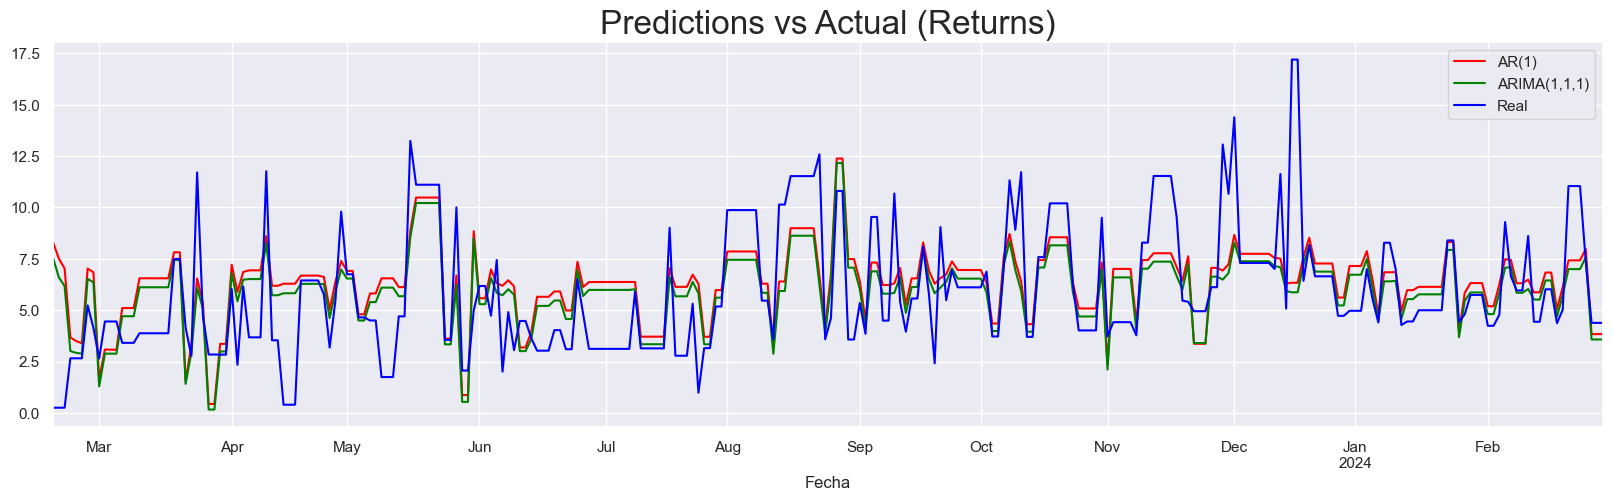

In [151]:
df_pred_armax2[start_date:end_date].plot(figsize = (20,5), color = "red")
df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "green")
df_test['Precio Unitario FOB (USD) Peso Neto'][start_date:end_date].plot(color = "blue")
plt.legend(['AR(1)','ARIMA(1,1,1)','Real'])
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

Los resultados son mucho mejores y bastante inetersantes

#### Auto Arima

Como experimento, usaremos Auto arima que es una herramienta útil, aunque no reemplaza el proceso exploratorio usual.

In [152]:
from pmdarima.arima import auto_arima

In [153]:
model_auto = auto_arima(data['Precio Unitario FOB (USD) Peso Neto'])

In [154]:
model_auto

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [155]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1077
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2668.945
Date:                Thu, 13 Jun 2024   AIC                           5343.890
Time:                        17:20:06   BIC                           5358.833
Sample:                    01-02-2019   HQIC                          5349.549
                         - 02-16-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5930      0.018    -32.263      0.000      -0.629      -0.557
ma.L2         -0.3639      0.021    -17.605      0.000      -0.404      -0.323
sigma2         8.3380      0.194     43.058      0.000       7.958       8.718
===================================================================================
Ljung-Box (L1) (Q):                   3.51   Jarque-Bera (JB):              1493.88
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Agregando detalles como datos exógenos e hiperparametros:

In [156]:
model_auto2 = auto_arima(dataset['Precio Unitario FOB (USD) Peso Neto'], exogenous = dataset[['kilosnetos',	'Valortotal', 'Desvest']], #m = 5,
                       #max_order = None, max_p = 10, max_q = 10, max_d = 2, #, max_P = 1, max_Q = 1, max_D = 1,
                       maxiter = 150, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample_size = int(len(dataset)*0.2))

In [157]:
model_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1347
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3318.126
Date:                Thu, 13 Jun 2024   AIC                           6646.253
Time:                        17:20:23   BIC                           6672.277
Sample:                             0   HQIC                          6656.000
                               - 1347                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0187      0.018     -1.030      0.303      -0.054       0.017
drift       2.191e-05      2e-05      1.098      0.272   -1.72e-05     6.1e-05
ma.L1         -0.5646      0.019    -29.806      0.000      -0.602      -0.527
ma.L2         -0.3511      0.021    -16.958      0.000      -0.392      -0.311
sigma2         8.2025      0.227     36.067      0.000       7.757       8.648
===================================================================================
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):              1456.78
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Volatilidad

Ahora vamos a estudiar la volatilidad con ARCH y GARCH

In [158]:
from arch import arch_model

Empezamos por ARCH(1)

In [159]:
model_arch_1 = arch_model(data['Precio Unitario FOB (USD) Peso Neto'], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()
results_arch_1.summary()

Iteration:      5,   Func. Count:     27,   Neg. LLF: 2671.1706202762143
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2671.1706202762143
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Constant Mean - ARCH Model Results                              
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   R-squared:                       0.000
Mean Model:                              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                        ARCH   Log-Likelihood:               -2671.17
Distribution:                                   Normal   AIC:                           5348.34
Method:                             Maximum Likelihood   BIC:                           5363.29
                                                         No. Observations:                 1077
Date:                                 Thu, Jun 13 2024   Df Residuals:                     1076
Time:                                         17:20:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             5.3209      0.119     44.596      0.000 [  5.087,  5.555]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          6.1395      0.888      6.913  4.740e-12 [  4.399,  7.880]
alpha[1]       0.3719  6.121e-02      6.075  1.242e-09 [  0.252,  0.492]
========================================================================

Covariance estimator: robust
"""

El modelo ARCH(2) o ARCH(p) para p>1 no es significativo.

In [160]:
model_arch_3 = arch_model(data['Precio Unitario FOB (USD) Peso Neto'], mean = "Constant", vol = "ARCH", p = 2)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 2674.81308333494
Iteration:     10,   Func. Count:     55,   Neg. LLF: 2671.1706214156166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2671.170620328624
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Constant Mean - ARCH Model Results                              
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   R-squared:                       0.000
Mean Model:                              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                        ARCH   Log-Likelihood:               -2671.17
Distribution:                                   Normal   AIC:                           5350.34
Method:                             Maximum Likelihood   BIC:                           5370.27
                                                         No. Observations:                 1077
Date:                                 Thu, Jun 13 2024   Df Residuals:                     1076
Time:                                         17:20:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             5.3209      0.119     44.549      0.000 [  5.087,  5.555]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          6.1397      0.980      6.262  3.802e-10 [  4.218,  8.061]
alpha[1]       0.3719  7.385e-02      5.035  4.771e-07 [  0.227,  0.517]
alpha[2]   9.7318e-11      0.114  8.574e-10      1.000 [ -0.222,  0.222]
========================================================================

Covariance estimator: robust
"""

Probaremos con GARCH(1,1)

In [161]:
model_garch_1_1 = arch_model(data['Precio Unitario FOB (USD) Peso Neto'], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 2671.3464386372966
Iteration:     10,   Func. Count:     56,   Neg. LLF: 2671.1706210561406
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2671.1706206511208
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Constant Mean - GARCH Model Results                              
===============================================================================================
Dep. Variable:     Precio Unitario FOB (USD) Peso Neto   R-squared:                       0.000
Mean Model:                              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                       GARCH   Log-Likelihood:               -2671.17
Distribution:                                   Normal   AIC:                           5350.34
Method:                             Maximum Likelihood   BIC:                           5370.27
                                                         No. Observations:                 1077
Date:                                 Thu, Jun 13 2024   Df Residuals:                     1076
Time:                                         17:20:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             5.3209      0.120     44.515      0.000 [  5.087,  5.555]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          6.1393      2.652      2.315  2.062e-02 [  0.941, 11.337]
alpha[1]       0.3719      0.124      2.997  2.722e-03 [  0.129,  0.615]
beta[1]        0.0000      0.343      0.000      1.000 [ -0.672,  0.672]
========================================================================

Covariance estimator: robust
"""

Como vemos no es significativo

#### Evaluación

Acá evaluaremos los resultados

In [162]:
mod_arch = arch_model(dataset['Precio Unitario FOB (USD) Peso Neto'], vol = "ARCH", p = 1, mean = "constant", dist = "Normal")
res_arch = mod_arch.fit(last_obs = start_date, update_freq = 10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2671.1706202762143
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6


In [163]:
pred_arch = res_arch.forecast(horizon = 1, align = 'target')

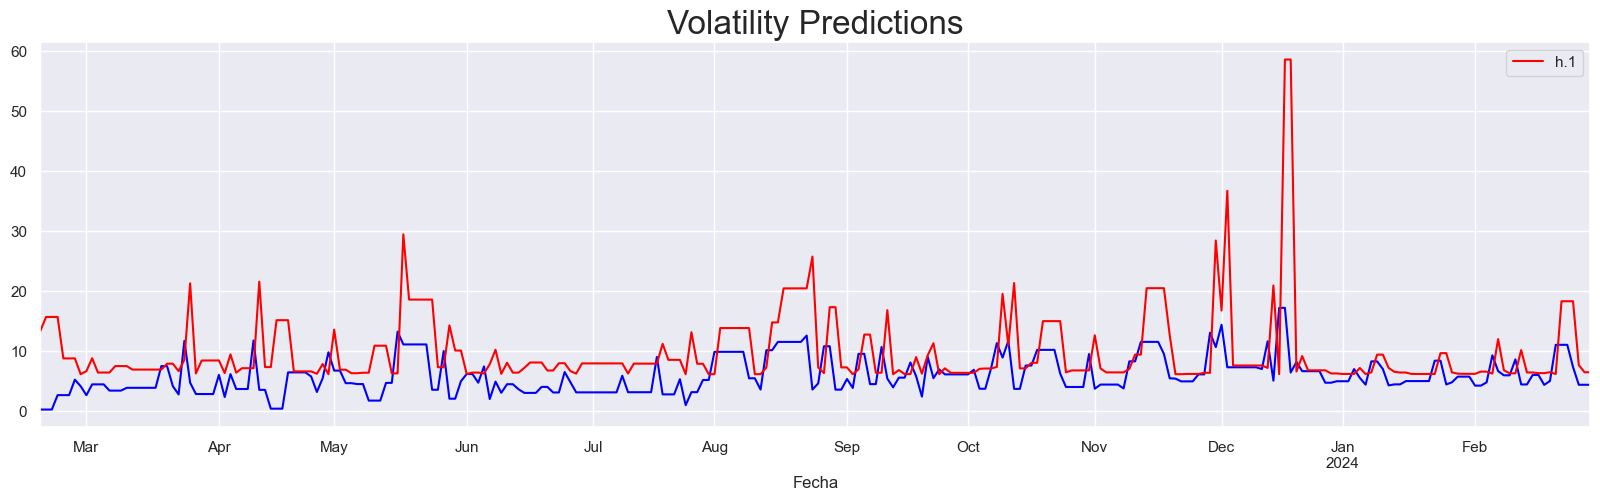

In [164]:
pred_arch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
df_test['Precio Unitario FOB (USD) Peso Neto'].abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()

## Guardamos los modelos

In [165]:
import pickle

Modelo ARMAX(1,0)

In [166]:
pickle.dump(results_ret_armax1, open('models/armax1_0_model.sav', 'wb'))

Modelo ARIMAX(1,1,1)

In [167]:
pickle.dump(results_ret_armax2, open('models/arimax1_1_1_model.sav', 'wb'))

Modelo ARCH(1)

In [168]:
pickle.dump(results_arch_1, open('models/arch1_model.sav', 'wb'))